In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [2]:
#importing the data

#dataset = pd.read_csv('/Users/ishraq/Downloads/Shap_retention /Retention copy 2.csv')
dataset = pd.read_csv('data/Retention.csv' )

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,Y,E
0,3,1,-11,-2,-2,-2,296,0,-11,25
1,1,2,-11,-3,-2,-2,22,22,-10,13
2,4,2,-11,-2,-2,-2,5,5,-11,25
3,3,3,-10,-2,-2,-3,227,2,-11,25
4,1,1,-10,-2,-2,-2,187,20,-10,1


In [4]:
# remove E column
dataset = dataset.drop(['E'], axis=1)
dataset.shape
dataset.head()  

,0,1,2,3,4,5,6,7,Y
0,3,1,-11,-2,-2,-2,296,0,-11
1,1,2,-11,-3,-2,-2,22,22,-10
2,4,2,-11,-2,-2,-2,5,5,-11
3,3,3,-10,-2,-2,-3,227,2,-11
4,1,1,-10,-2,-2,-2,187,20,-10


In [5]:
dataset.rename(columns={"0": "Position", 
                        "1": "Organization",
                        "2": "Potential", 
                        "3": "Rating", 
                        "4": "Rating slope", 
                        "5": "Salary competitiveness", 
                        "6": "Tenure", 
                        "7": "Position tenure"}, inplace=True)

In [6]:
dataset[['Y']] = dataset[['Y']].replace([-11, -10], [0, 1])
dataset[['Potential']] = dataset[['Potential']].replace([-11, -10], [0, 1])
dataset[['Rating']] = dataset[['Rating']].replace([-1, -2, -3], [1, 2, 3])
dataset[['Rating slope']] = dataset[['Rating slope']].replace([-1, -2, -3], [1, 2, 3])
dataset[['Salary competitiveness']] = dataset[['Salary competitiveness']].replace([-1, -2, -3], [1, 2, 3])

In [7]:
dataset.head()

,Position,Organization,Potential,Rating,Rating slope,Salary competitiveness,Tenure,Position tenure,Y
0,3,1,0,2,2,2,296,0,0
1,1,2,0,3,2,2,22,22,1
2,4,2,0,2,2,2,5,5,0
3,3,3,1,2,2,3,227,2,0
4,1,1,1,2,2,2,187,20,1


In [8]:
df_copy = dataset.copy()

In [9]:
#from sklearn import preprocessing
#import pandas as pd
#
#le = preprocessing.LabelEncoder()
#le.fit_transform(dataset['Position'])
##dataset.head()


df_PosDummy = pd.get_dummies(dataset['Position'],prefix=['Pos'], drop_first=True)
# df_PosDummy.head()
df_OrgDummy = pd.get_dummies(dataset['Organization'],prefix=['Org'], drop_first=True)
# df_OrgDummy.head()
df_PotenDummy = pd.get_dummies(dataset['Potential'],prefix=['Pot'], drop_first=True)
# df_PotenDummy.head()
df_RatingDummy = pd.get_dummies(dataset['Rating'],prefix=['Rating'], drop_first=True)
# df_RatingDummy.head()
df_RatSlopeDummy = pd.get_dummies(dataset['Rating slope'],prefix=['RatSlope'], drop_first=True)
# df_RatSlopeDummy.head()
df_SalCompDummy = pd.get_dummies(dataset['Salary competitiveness'],prefix=['SalComp'], drop_first=True)
# df_SalCompDummy.head()



In [10]:
df_SalCompDummy.columns

Index(['['SalComp']_2', '['SalComp']_3'], dtype='object')

In [11]:
#df_SalCompDummy.head()
dataset = pd.concat([df_PosDummy,df_OrgDummy,df_PotenDummy,df_RatingDummy,df_RatSlopeDummy,df_SalCompDummy], axis=1)
dataset.head()

,['Pos']_2,['Pos']_3,['Pos']_4,['Org']_2,['Org']_3,['Pot']_1,['Rating']_2,['Rating']_3,['RatSlope']_2,['RatSlope']_3,['SalComp']_2,['SalComp']_3
0,0,1,0,0,0,0,1,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,1,0
2,0,0,1,1,0,0,1,0,1,0,1,0
3,0,1,0,0,1,1,1,0,1,0,0,1
4,0,0,0,0,0,1,1,0,1,0,1,0


In [12]:
dataset['Tenure'] = df_copy['Tenure']
dataset['Position tenure'] = df_copy['Position tenure']
dataset['Y'] = df_copy['Y']
dataset.head()

,['Pos']_2,['Pos']_3,['Pos']_4,['Org']_2,['Org']_3,['Pot']_1,['Rating']_2,['Rating']_3,['RatSlope']_2,['RatSlope']_3,['SalComp']_2,['SalComp']_3,Tenure,Position tenure,Y
0,0,1,0,0,0,0,1,0,1,0,1,0,296,0,0
1,0,0,0,1,0,0,0,1,1,0,1,0,22,22,1
2,0,0,1,1,0,0,1,0,1,0,1,0,5,5,0
3,0,1,0,0,1,1,1,0,1,0,0,1,227,2,0
4,0,0,0,0,0,1,1,0,1,0,1,0,187,20,1


In [ ]:
dataset.iloc[:,0:14]

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

import numpy as np
import shap
#import time
# X,y = shap.datasets.diabetes()

# X = dataset[['Position','Organization','Potential','Rating','Rating slope','Salary competitiveness','Tenure','Position tenure']]
# y = dataset['Y']

X = dataset.iloc[:,0:14]
y = dataset['Y']

In [15]:
X.rename(columns={"['Pos']_2": "Pos2", 
                        "['Pos']_3": "Pos3",
                        "['Pos']_4": "Pos4",
                        "['Org']_2": "Org2", 
                        "['Org']_3": "Org3",
                        "['Pot']_1": "Pot1", 
                        "['Rating']_2": "Rat2",
                        "['Rating']_3": "Rat3", 
                        "['RatSlope']_2": "RatSlop2",
                        "['RatSlope']_3": "RatSlop3",
                        "['SalComp']_2": "SalCom2",
                        "['SalComp']_3": "SalCom3"}, inplace=True)
X.columns

Index(['Pos2', 'Pos3', 'Pos4', 'Org2', 'Org3', 'Pot1', 'Rat2', 'Rat3',
       'RatSlop2', 'RatSlop3', 'SalCom2', 'SalCom3', 'Tenure',
       'Position tenure'],
      dtype='object')

In [ ]:
# X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
# y = dataset.iloc[:,8].values

In [16]:
# Normalize tenures

cols_to_norm = ['Tenure','Position tenure']
X[cols_to_norm] = X[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [17]:
X.head()

,Pos2,Pos3,Pos4,Org2,Org3,Pot1,Rat2,Rat3,RatSlop2,RatSlop3,SalCom2,SalCom3,Tenure,Position tenure
0,0,1,0,0,0,0,1,0,1,0,1,0,0.824513,0.000000
1,0,0,0,1,0,0,0,1,1,0,1,0,0.061281,0.065672
2,0,0,1,1,0,0,1,0,1,0,1,0,0.013928,0.014925
3,0,1,0,0,1,1,1,0,1,0,0,1,0.632312,0.005970
4,0,0,0,0,0,1,1,0,1,0,1,0,0.520891,0.059701


In [18]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [ ]:
"""
#feature scale 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""

In [19]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.8)
classifier.fit(X_train, y_train)



XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
cm # 98% accurate 

array([[1285,   25],
       [  95,  595]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1310
           1       0.96      0.86      0.91       690

    accuracy                           0.94      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.94      0.94      2000



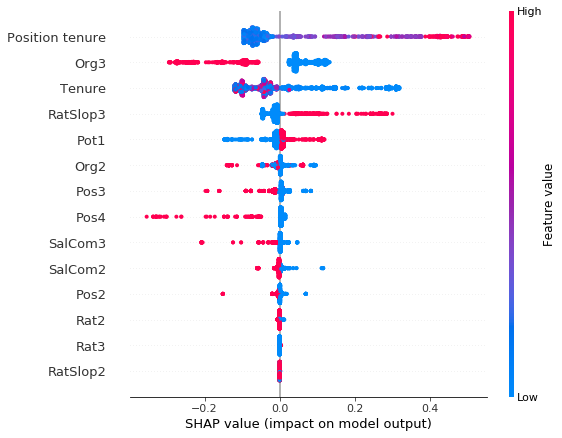

In [25]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
#X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)



In [26]:
# visualize the i'th prediction's explanation (use matplotlib=True to avoid Javascript)
i = 4
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])

In [27]:
print(X_test.iloc[i,:], '\n')
print('Prediction ===>', y_pred[i], '\n')
print('Real value ===>', np.asarray(y_test)[i])

Pos2               0.000000
Pos3               1.000000
Pos4               0.000000
Org2               0.000000
Org3               0.000000
Pot1               1.000000
Rat2               0.000000
Rat3               1.000000
RatSlop2           1.000000
RatSlop3           0.000000
SalCom2            1.000000
SalCom3            0.000000
Tenure             0.013928
Position tenure    0.014925
Name: 4521, dtype: float64 

Prediction ===> 1 

Real value ===> 1


In [28]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

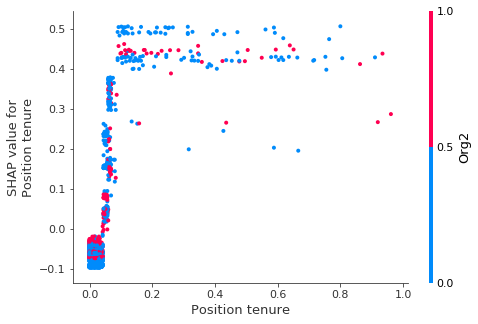

In [29]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Position tenure", shap_values, X_test)

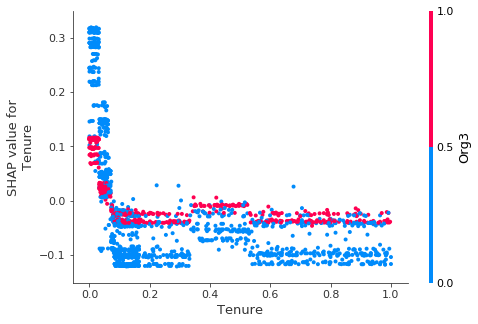

In [30]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Tenure", shap_values, X_test)

Could not find feature named: Salary competitiveness


ValueError: m has more than 2 dimensions

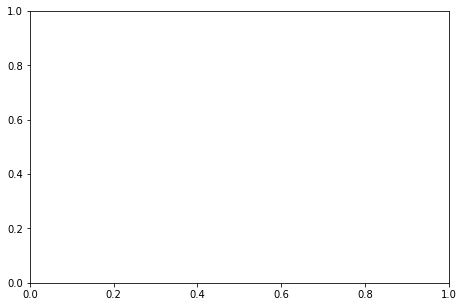

In [31]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Salary competitiveness", shap_values, X_test)

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")